<a href="https://colab.research.google.com/github/quciya/Solar_radiation_prediction/blob/main/solarradiationusingXGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
! pip install h5py==2.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 7.6 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/Solar_radiation/Dataset/Pokhara_data_thesis.xlsx')
df.head(20)

,S.No,Susshine_Hour_(n),Daylength(N),Radiation MJ/M2/Day,Rainfall (mm),R.H(8:45),R.H(17:45),T.max,T.min,Wind Speed
0,1.0,DNA,NaN,5.165280,0.0,86.1,57.1,20.0,2.5,-99.9
1,2.0,3.3,NaN,5.033088,0.0,88.2,65.0,19.0,2.0,1.5
2,3.0,1.0,NaN,5.278930,0.0,96.8,71.8,18.0,1.8,0.7
3,4.0,4.8,NaN,6.117552,0.0,88.9,76.9,17.0,4.4,0.4
4,5.0,4.6,NaN,6.509232,0.0,91.2,61.4,18.2,4.0,0.6
5,6.0,7.1,NaN,6.544116,0.0,96.9,67.1,17.0,2.2,1.0
6,7.0,7.3,NaN,6.775856,0.0,96.9,67.1,17.5,1.0,0.6
7,8.0,3.5,NaN,5.978016,0.0,96.9,76.1,16.3,1.5,0.5
8,9.0,3.6,NaN,7.364808,0.0,96.7,70.0,16.5,1.5,0.6
9,10.0,5.5,NaN,5.929004,0.0,96.9,56.8,18.8,1.5,0.4


In [ ]:
df['Daylength(N)'] = df['Daylength(N)'].replace(np.nan, 0)
df['R.H(8:45)'] = df['R.H(8:45)'].replace(np.nan, 0)
df.head(20)

,S.No,Susshine_Hour_(n),Daylength(N),Radiation MJ/M2/Day,Rainfall (mm),R.H(8:45),R.H(17:45),T.max,T.min,Wind Speed
0,1.0,DNA,0.0,5.165280,0.0,86.1,57.1,20.0,2.5,-99.9
1,2.0,3.3,0.0,5.033088,0.0,88.2,65.0,19.0,2.0,1.5
2,3.0,1.0,0.0,5.278930,0.0,96.8,71.8,18.0,1.8,0.7
3,4.0,4.8,0.0,6.117552,0.0,88.9,76.9,17.0,4.4,0.4
4,5.0,4.6,0.0,6.509232,0.0,91.2,61.4,18.2,4.0,0.6
5,6.0,7.1,0.0,6.544116,0.0,96.9,67.1,17.0,2.2,1.0
6,7.0,7.3,0.0,6.775856,0.0,96.9,67.1,17.5,1.0,0.6
7,8.0,3.5,0.0,5.978016,0.0,96.9,76.1,16.3,1.5,0.5
8,9.0,3.6,0.0,7.364808,0.0,96.7,70.0,16.5,1.5,0.6
9,10.0,5.5,0.0,5.929004,0.0,96.9,56.8,18.8,1.5,0.4


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [ ]:
df.shape

(365, 10)

In [ ]:
df_columns = df.columns.tolist()
df[df_columns].isnull().sum()

S.No                   0
Susshine_Hour_(n)      0
Daylength(N)           0
Radiation MJ/M2/Day    0
Rainfall (mm)          0
R.H(8:45)              0
R.H(17:45)             0
T.max                  0
T.min                  0
Wind Speed             0
dtype: int64

DATA VISUALIZATION


In [ ]:
df['Susshine_Hour_(n)'] = df['Susshine_Hour_(n)'].replace(['DNA'],0)

In [ ]:
df['R.H(8:45)'] = df['R.H(8:45)'].replace(['DNA'],0)
df.head()

,S.No,Susshine_Hour_(n),Daylength(N),Radiation MJ/M2/Day,Rainfall (mm),R.H(8:45),R.H(17:45),T.max,T.min,Wind Speed
0,1.0,0.0,0.0,5.165280,0.0,86.1,57.1,20.0,2.5,-99.9
1,2.0,3.3,0.0,5.033088,0.0,88.2,65.0,19.0,2.0,1.5
2,3.0,1.0,0.0,5.278930,0.0,96.8,71.8,18.0,1.8,0.7
3,4.0,4.8,0.0,6.117552,0.0,88.9,76.9,17.0,4.4,0.4
4,5.0,4.6,0.0,6.509232,0.0,91.2,61.4,18.2,4.0,0.6


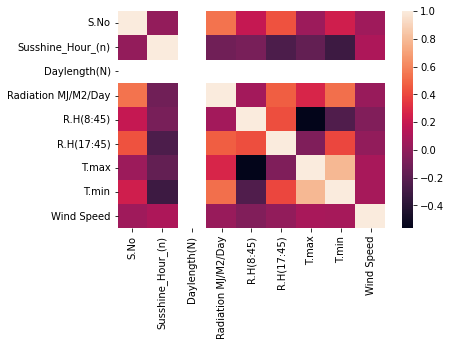

In [ ]:
import seaborn as sns
sns.heatmap(df.corr());

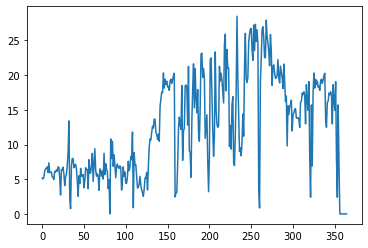

In [ ]:
df['Radiation MJ/M2/Day'].plot()

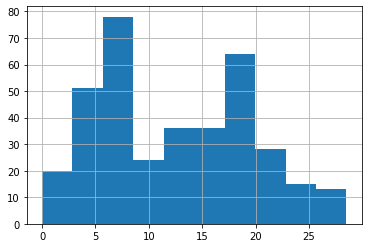

In [ ]:
df['Radiation MJ/M2/Day'].hist()

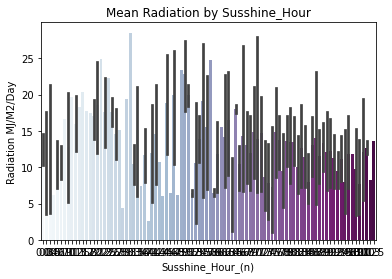

In [ ]:
ax = plt.axes()
sns.barplot(x="Susshine_Hour_(n)", y='Radiation MJ/M2/Day', data=df, palette="BuPu", ax = ax)
ax.set_title('Mean Radiation by Susshine_Hour')
plt.show()

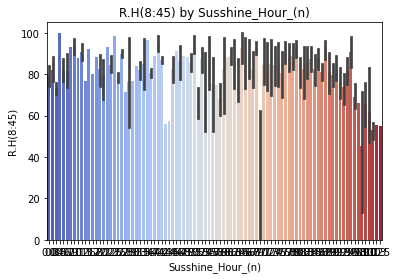

In [ ]:
ax = plt.axes()
sns.barplot(x="Susshine_Hour_(n)", y='R.H(8:45)', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('R.H(8:45) by Susshine_Hour_(n)')
plt.show()

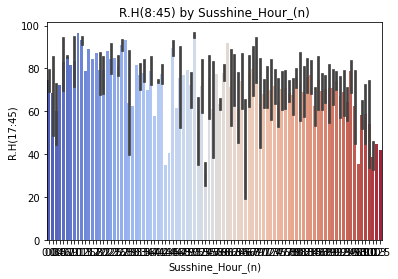

In [ ]:
ax = plt.axes()
sns.barplot(x="Susshine_Hour_(n)", y='R.H(17:45)', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('R.H(8:45) by Susshine_Hour_(n)')
plt.show()

Text(0.5, 0.98, 'Temp max vs. Radiation')

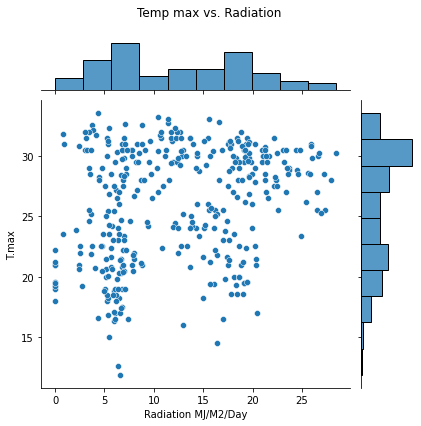

In [ ]:
g = sns.jointplot(x="Radiation MJ/M2/Day", y="T.max", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp max vs. Radiation')

Text(0.5, 0.98, 'Temp min vs. Radiation')

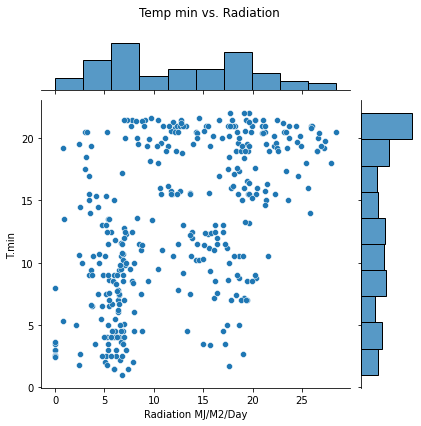

In [ ]:
g = sns.jointplot(x="Radiation MJ/M2/Day", y="T.min", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp min vs. Radiation')

In [ ]:
#using xgboost
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split

In [ ]:
df['Susshine_Hour_(n)'] = df['Susshine_Hour_(n)'].astype(float)

In [ ]:
final_data=df.drop(['S.No','Daylength(N)','Rainfall (mm)'],axis=1)
print(final_data)

     Susshine_Hour_(n)  Radiation MJ/M2/Day  R.H(8:45)  R.H(17:45)  T.max  \
0                  0.0             5.165280       86.1        57.1   20.0   
1                  3.3             5.033088       88.2        65.0   19.0   
2                  1.0             5.278930       96.8        71.8   18.0   
3                  4.8             6.117552       88.9        76.9   17.0   
4                  4.6             6.509232       91.2        61.4   18.2   
..                 ...                  ...        ...         ...    ...   
360                7.4             0.000000       97.0        76.9   18.0   
361                7.4             0.000000       97.1        68.7   19.5   
362                7.5             0.000000       97.1        60.8   21.0   
363                8.0             0.000000       94.1        61.6   21.0   
364                5.3             0.000000       94.0        56.5   21.2   

     T.min  Wind Speed  
0      2.5       -99.9  
1      2.0         1.5  


In [ ]:
final_y=final_data.pop('Radiation MJ/M2/Day')


In [ ]:
print(final_y)

0      5.165280
1      5.033088
2      5.278930
3      6.117552
4      6.509232
         ...   
360    0.000000
361    0.000000
362    0.000000
363    0.000000
364    0.000000
Name: Radiation MJ/M2/Day, Length: 365, dtype: float64


In [ ]:
final_x=final_data
print(final_x)

     Susshine_Hour_(n)  R.H(8:45)  R.H(17:45)  T.max  T.min  Wind Speed
0                  0.0       86.1        57.1   20.0    2.5       -99.9
1                  3.3       88.2        65.0   19.0    2.0         1.5
2                  1.0       96.8        71.8   18.0    1.8         0.7
3                  4.8       88.9        76.9   17.0    4.4         0.4
4                  4.6       91.2        61.4   18.2    4.0         0.6
..                 ...        ...         ...    ...    ...         ...
360                7.4       97.0        76.9   18.0    2.5         0.4
361                7.4       97.1        68.7   19.5    2.6         0.3
362                7.5       97.1        60.8   21.0    2.5         0.3
363                8.0       94.1        61.6   21.0    2.5         0.4
364                5.3       94.0        56.5   21.2    2.4         0.4

[365 rows x 6 columns]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)
X_train.head()

,Susshine_Hour_(n),R.H(8:45),R.H(17:45),T.max,T.min,Wind Speed
118,0.0,55.1,55.3,31.7,15.4,1.2
31,8.4,78.3,61.7,21.0,4.5,0.7
36,7.9,94.3,61.9,21.5,4.5,0.8
285,0.0,88.7,96.0,28.0,14.6,0.3
181,5.3,76.6,76.9,30.0,19.0,0.4


In [ ]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
xpredictions=final_gb.predict(tesdmat)
print(xpredictions)

[09:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11.066619   3.9286034  5.5286627 10.564932   3.8753703 10.255636
  7.5523844  7.2648516  9.264115   9.264115  10.51346    4.0384655
  7.07251    4.741083   7.869787   7.4048395  4.3159175  9.819975
 10.51346    4.532366   3.396561   6.9537063  3.9286034 11.104247
 11.279557  11.374707  11.374707  11.477627   7.8690987  4.7625194
  3.3874984  7.2648516  3.3395827  4.3159175 11.104247   5.1810985
  4.575245   4.3383417 10.51346    6.591551  10.7993555  4.8820815
  4.7175837  9.166057   5.3874283 11.374707   4.6436787  4.3748646
  2.9933565  8.894261  11.374707   5.4663787 11.660597  11.104247
 10.26053    8.201889   5.0372834  7.454671   6.4407578  3.9286034
 11.104247   6.6976857  4.209027   6.3664293 11.660597   6.7453036
  8.418588   9.351651  11.374707   6.643023   7.645005  10.992401
 10.51346   10.992401   7.172282  10.897251   8.620386   4.142357
  4.3159

Text(0, 0.5, 'Predicted Y')

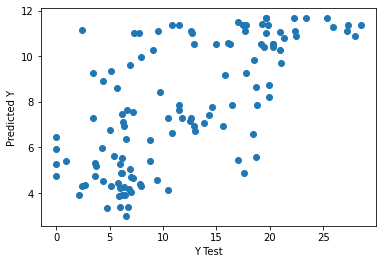

In [ ]:
plt.scatter(y_test,xpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(f"Accuracy-: {r2_score(y_test, xpredictions)}\n")
print(f'MAE:', metrics.mean_absolute_error(y_test, xpredictions))
print(f'MSE:', metrics.mean_squared_error(y_test, xpredictions))
print(f'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xpredictions)))

Accuracy-: 0.05779017271485898

MAE: 5.517472618398376
MSE: 48.33479343129954
RMSE: 6.952322880253731
